<a href="https://colab.research.google.com/github/Janvithakur/AI-and-ML/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

data = pd.read_csv(url)

In [6]:
print(data.head())
print(data.info())

   63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0 0.0.1  \
0  67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0   3.0   
1  67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0   2.0   
2  37.0  1.0    3.0  130.0  250.0    0.0  0.0  187.0  0.0  3.5  3.0   0.0   
3  41.0  0.0    2.0  130.0  204.0    0.0  2.0  172.0  0.0  1.4  1.0   0.0   
4  56.0  1.0    2.0  120.0  236.0    0.0  0.0  178.0  0.0  0.8  1.0   0.0   

   6.0  0  
0  3.0  2  
1  7.0  1  
2  3.0  0  
3  3.0  0  
4  3.0  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   63.0    302 non-null    float64
 1   1.0     302 non-null    float64
 2   1.0.1   302 non-null    float64
 3   145.0   302 non-null    float64
 4   233.0   302 non-null    float64
 5   1.0.2   302 non-null    float64
 6   2.0     302 non-null    float64
 7   150.0   302 non-null  

In [10]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Read the data, replacing '?' with NaN


In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Read the data, replacing '?' with NaN
data = pd.read_csv(url, na_values="?")

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Read the data, replacing '?' with NaN
data = pd.read_csv(url, na_values="?", header=None)  # Added header=None

# Assuming the last column is the target variable, rename it to 'target'

In [25]:
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Impute missing values using the mean
# Imputation is necessary to handle the NaN values introduced by replacing '?'
for column in data.columns:
    if data[column].dtype == 'float64':
        data[column] = data[column].fillna(data[column].mean())

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_accuracies = []
test_accuracies = []
depth_range = range(1, 21)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

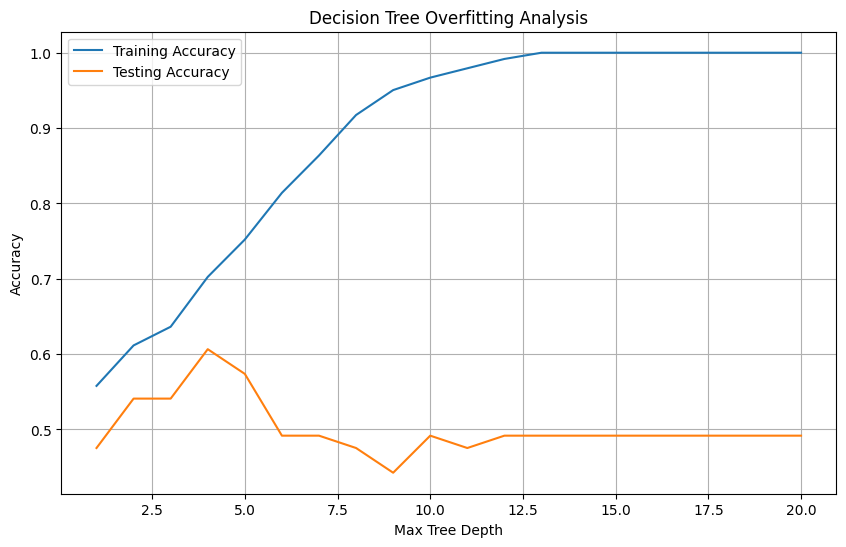

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label='Training Accuracy')
plt.plot(depth_range, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Overfitting Analysis')
plt.legend()
plt.grid()
plt.show()

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.4918032786885246


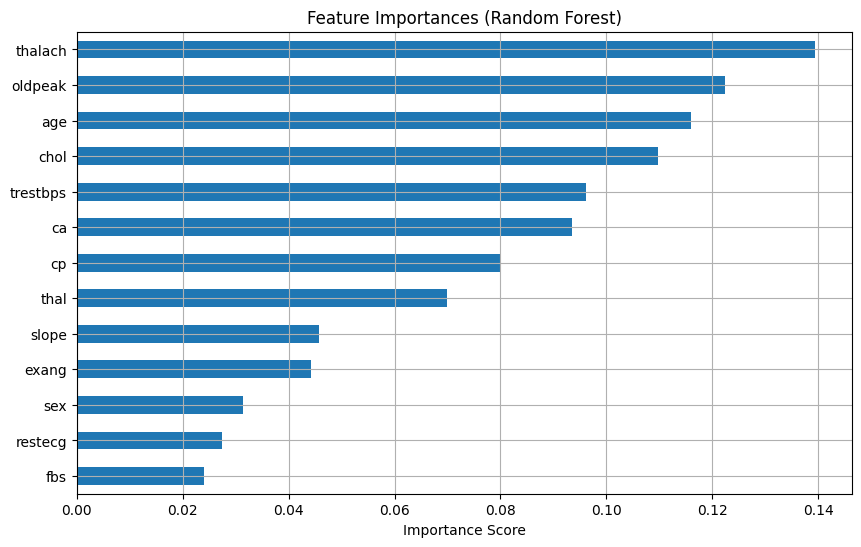

In [29]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.grid()
plt.show()

In [30]:
dtree_cv_scores = cross_val_score(dtree, X, y, cv=5)
rf_cv_scores = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:", dtree_cv_scores.mean())
print("Random Forest CV Accuracy:", rf_cv_scores.mean())

Decision Tree CV Accuracy: 0.494808743169399
Random Forest CV Accuracy: 0.5971584699453552
